In [1]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
for experiment in Experiment:
    dump_stats_summary(experiment)
    print_stats_summary(experiment)

------ Experiment.basic_zero_plus_discr ------
count hardware:  55
methods used:  {'convex'}
count embeddings:  109
total diff. algorithms (bellman):  0
total diff. algorithms (convex):  82
accuracy perfect hardware: 0.75

min. accuracy: 0.52602
avg. accuracy: 0.7232
max. accuracy: 0.75

min. pomdp build time: 0.00273
avg. pomdp build time: 0.02249
max. pomdp build time: 0.74658

min. method time: 0.74658
avg. method time: 14.09025
max. method time: 18.0

min. total time: 0.74658
avg. total time: 14.10582
max. total time: 18.0511

--

num. algorithms per horizon (method=convex)
3 :  82
---------------



------ Experiment.bell_state_reach ------
count hardware:  45
methods used:  {'bellman', 'convex'}
count embeddings:  140
total diff. algorithms (bellman):  9
total diff. algorithms (convex):  51
accuracy perfect hardware: 0.5, 1.0, 0.5, 1.0, 1.0

min. accuracy: 0.49975
avg. accuracy: 0.78952
max. accuracy: 1.00501

min. pomdp build time: 0.06992
avg. pomdp build time: 10.59342
max. po

# Running times

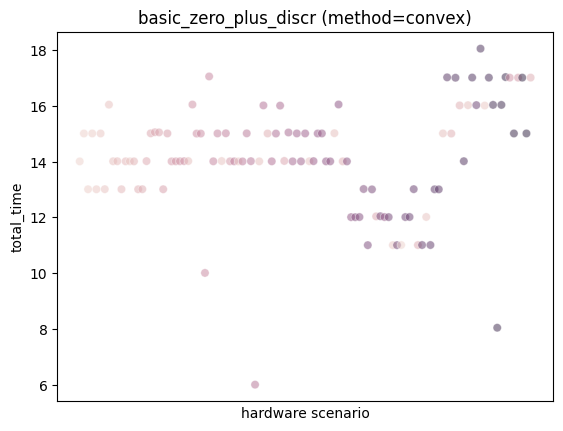

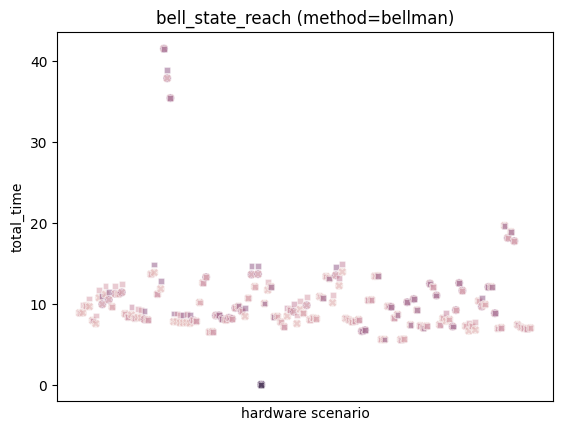

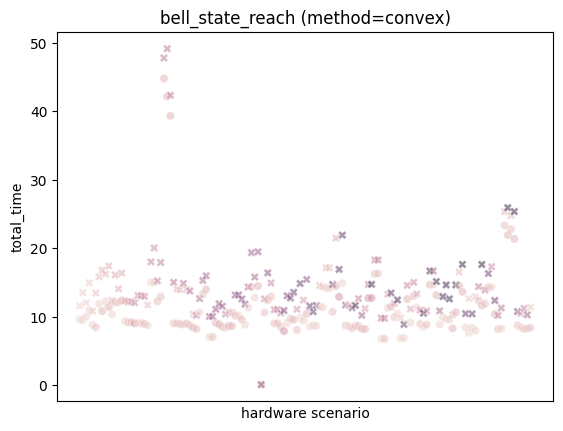

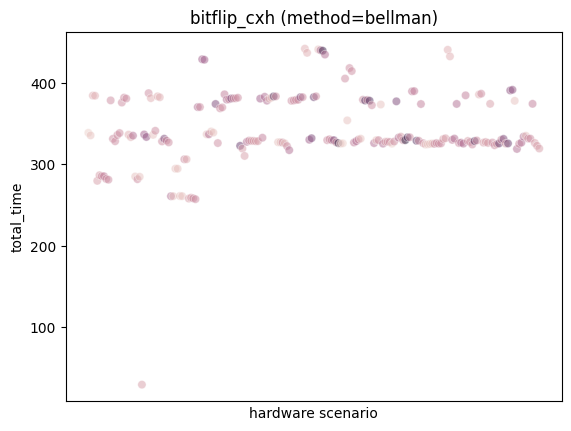

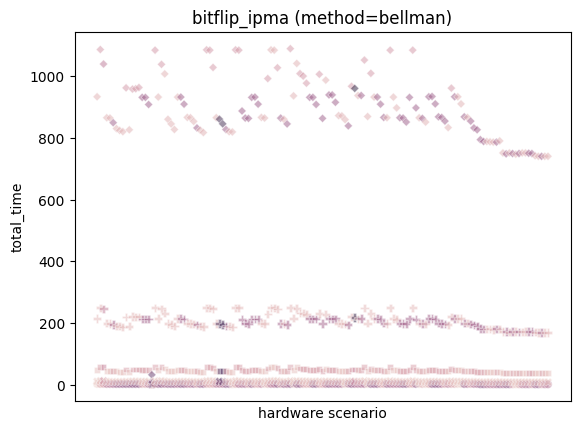

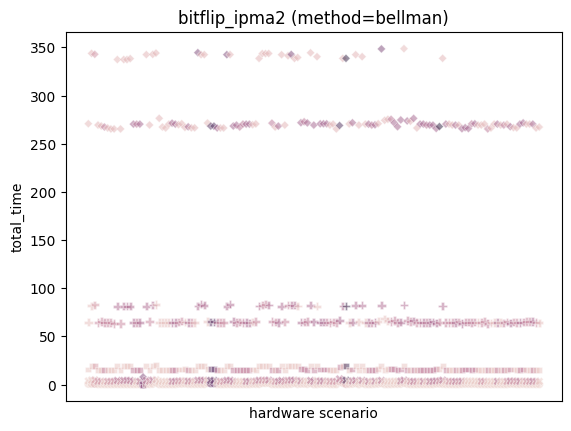

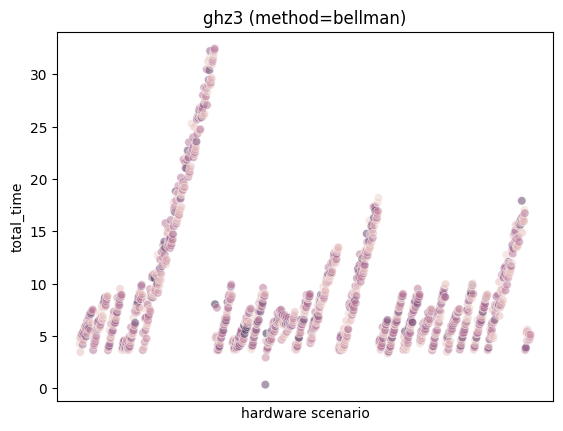

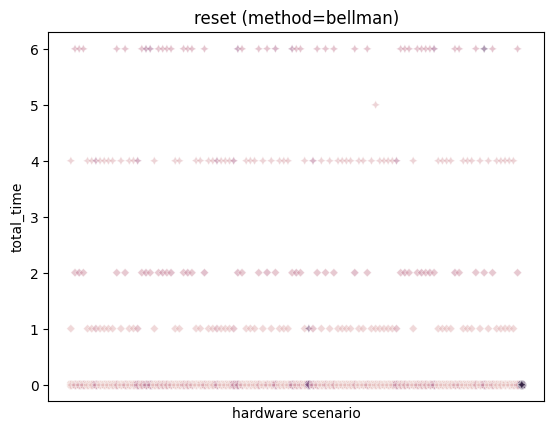

In [25]:
for experiment in Experiment:
    for method in get_methods_used(experiment):
        plt.figure()
        df = pd.read_csv(get_stats_path(experiment))
        df = df[df.method == method]
        df["instance"] = df["hardware"] + df["embedding_index"].astype(str)
        df["total_time"] = df["method_time"] + df["pomdp_build_time"]
        sns.scatterplot(data=df, x="instance", y="total_time", hue="algorithm_index", style="horizon", alpha=0.5, legend=False)
        plt.title(f"{experiment.value} (method={method})")
        # Remove x-axis tick values
        plt.xticks([])

        # Change x-axis label
        plt.xlabel("hardware scenario")
        plt.show()


# Algorithm Verification

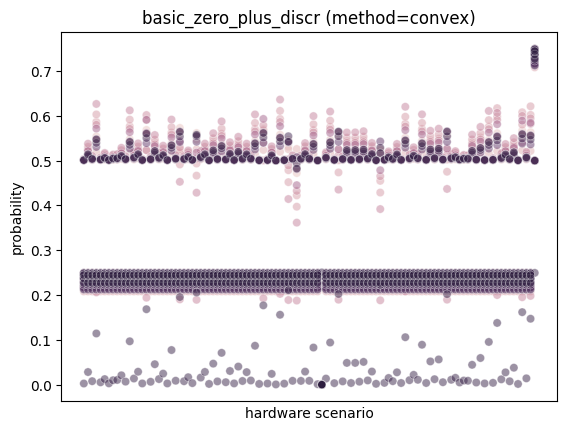

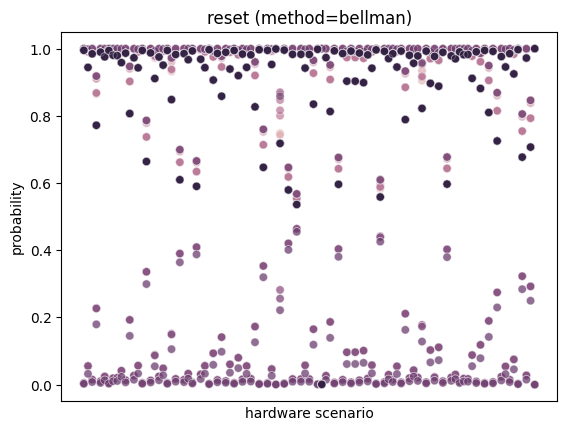

In [24]:
for experiment in [Experiment.basic_zero_plus_discr, Experiment.reset]:
    for method in get_methods_used(experiment):
        plt.figure()
        df = pd.read_csv(get_verification_path(experiment))
        df = df[df.method == method]
        df["instance"] = df["hardware"] + df["embedding_index"].astype(str)
        sns.scatterplot(data=df, x="instance", y="probability", hue="algorithm_index", alpha=0.5, legend=False)
        plt.title(f"{experiment.value} (method={method})")
        # Remove x-axis tick values
        plt.xticks([])

        # Change x-axis label
        plt.xlabel("hardware sccaenario")
        plt.show()
